<a href="https://colab.research.google.com/github/MedZied23/spotify_datanalysis_project/blob/main/dataAnalysisProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import xlrd
import pandas as pd
#chargement de la première feuille de données,
#première ligne avec noms des variables
#et première colonne identifiant des individus
X = pd.read_excel("Popular_Spotify_Songs.xlsx",header=0,index_col=0)
#affichage des données
print(X)

                                         artist(s)_name  artist_count  \
track_name                                                              
Seven (feat. Latto) (Explicit Ver.)    Latto, Jung Kook             2   
LALA                                        Myke Towers             1   
vampire                                  Olivia Rodrigo             1   
Cruel Summer                               Taylor Swift             1   
WHERE SHE GOES                                Bad Bunny             1   
...                                                 ...           ...   
My Mind & Me                               Selena Gomez             1   
Bigger Than The Whole Sky                  Taylor Swift             1   
A Veces (feat. Feid)                 Feid, Paulo Londra             2   
En La De Ella                        Feid, Sech, Jhayco             3   
Alone                                         Burna Boy             1   

                                     released_year

In [ ]:
#dimension
print(X.shape)
#nombre d'individus
n = X.shape[0]
#nombre de variables
p = X.shape[1]
print(n)
print(p)

#afficher les premières lignes du jeu de données
print(X.head())

#description des données
print(X.describe(include='all'))

(953, 23)
953
23
                                       artist(s)_name  artist_count  \
track_name                                                            
Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
LALA                                      Myke Towers             1   
vampire                                Olivia Rodrigo             1   
Cruel Summer                             Taylor Swift             1   
WHERE SHE GOES                              Bad Bunny             1   

                                     released_year  released_month  \
track_name                                                           
Seven (feat. Latto) (Explicit Ver.)           2023               7   
LALA                                          2023               3   
vampire                                       2023               6   
Cruel Summer                                  2019               8   
WHERE SHE GOES                                2023               

Data Cleaning

In [ ]:
import pandas as pd
import numpy as np

df = pd.DataFrame(X)
print(df.shape)
# supprimer les lignes ou il y a des valeurs manquantes
df=df.dropna()
print(df.shape)
# voir si les types des variables et si il y a des valeurs non compatibles
print(df.dtypes)

# Définir une fonction pour supprimer les virgules uniquement des valeurs textuelles
def remove_commas(x):
    if isinstance(x, str):  # Vérifier si la valeur est une chaîne de caractères
        return x.replace(',', '')  # Supprimer les virgules
    else:
        return x  # Retourner la valeur telle quelle si ce n'est pas une chaîne de caractères

# Appliquer la fonction aux colonnes 'in_deezer_playlists' et 'in_shazam_charts'
df['in_deezer_playlists'] = df['in_deezer_playlists'].apply(remove_commas)
df['in_shazam_charts'] = df['in_shazam_charts'].apply(remove_commas)

# Convertir les colonnes en type entier
df['in_deezer_playlists'] = df['in_deezer_playlists'].astype('int64', errors='ignore')
df['in_shazam_charts'] = df['in_shazam_charts'].astype('int64', errors='ignore')

print(df.dtypes)
print(df.shape)
# limiter ma base de données à 500 lignes
df=df.head(500)
print(df.shape)


(953, 23)
(817, 23)
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                  int64
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                  int64
in_ap

Preprocessing

In [ ]:
import numpy as np

np.set_printoptions(precision=2, suppress=True)

columns_to_drop_numeric = ['artist(s)_name',
                   'artist_count',
                   'released_year',
                   'released_month',
                   'released_day',
                   'key',
                   'mode',
                   'bpm',
                   'danceability_%',
                   'valence_%',
                   'energy_%',
                   'acousticness_%',
                   'instrumentalness_%',
                   'liveness_%',
                   'speechiness_%']  # List of column names to drop for the numeric dataframe
columns_to_keep_qual = ['key','mode'] # List of column names to drop for the qualitative dataframe
print(df.columns.tolist())
df_num = df.drop(columns = columns_to_drop_numeric)
print('///////////////////////////////')
print(df_num.corr())
df_qual = df[columns_to_keep_qual]
df = df.drop(columns = list(set(columns_to_drop_numeric)-set(columns_to_keep_qual)))
print(df_num.dtypes)
print(df_qual.dtypes)
print(df.dtypes)
X=df_num.values
print(X)
print('*****************************')
#classe StandardScaler pour standardisation (centrage et reduction)
from sklearn.preprocessing import StandardScaler
#instanciation
sc = StandardScaler()
#transformation – centrage-réduction
Z = sc.fit_transform(X)
print(Z)

['artist(s)_name', 'artist_count', 'released_year', 'released_month', 'released_day', 'in_spotify_playlists', 'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm', 'key', 'mode', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']
///////////////////////////////
                      in_spotify_playlists  in_spotify_charts   streams  \
in_spotify_playlists              1.000000           0.166996  0.802396   
in_spotify_charts                 0.166996           1.000000  0.220296   
streams                           0.802396           0.220296  1.000000   
in_apple_playlists                0.654756           0.242879  0.684330   
in_apple_charts                   0.124755           0.614186  0.162815   
in_deezer_playlists               0.777322           0.102435  0.629307   
in_deezer_charts                  0.114483           0.553826

ACP

In [ ]:
#calculer la matrice de coorélation
Coor = df_num.corr()

#affichage de la matrice de corrélation en pourcentage
print(Coor)


                      in_spotify_playlists  in_spotify_charts   streams  \
in_spotify_playlists              1.000000           0.166996  0.802396   
in_spotify_charts                 0.166996           1.000000  0.220296   
streams                           0.802396           0.220296  1.000000   
in_apple_playlists                0.654756           0.242879  0.684330   
in_apple_charts                   0.124755           0.614186  0.162815   
in_deezer_playlists               0.777322           0.102435  0.629307   
in_deezer_charts                  0.114483           0.553826  0.193295   
in_shazam_charts                  0.052467           0.518627 -0.025130   

                      in_apple_playlists  in_apple_charts  \
in_spotify_playlists            0.654756         0.124755   
in_spotify_charts               0.242879         0.614186   
streams                         0.684330         0.162815   
in_apple_playlists              1.000000         0.312545   
in_apple_charts    

In [ ]:
import numpy as np

eigenvalues, eigenvectors = np.linalg.eig(Coor)

# Pas de tri des valeurs propres

# Construct diagonal matrix from unsorted eigenvalues
diagonal_matrix = np.diag(eigenvalues)

# Print diagonal matrix with eigenvalues in original order
print(diagonal_matrix)



[[3.36 0.   0.   0.   0.   0.   0.   0.  ]
 [0.   2.13 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.77 0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.14 0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.2  0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.32 0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.5  0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.58]]


In [ ]:
import pandas
# Calcul du pourcentage de variance expliquée par chacun des axes factoriels
tot = sum(eigenvalues)
var_exp = [(i / tot)*100 for i in sorted(eigenvalues, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print(pandas.DataFrame({'valprop':eigenvalues,'inertie':var_exp,'inertiecum':cum_var_exp}))

    valprop    inertie  inertiecum
0  3.358535  41.981684   41.981684
1  2.132593  26.657409   68.639093
2  0.769509   9.618865   78.257958
3  0.135040   7.306282   85.564240
4  0.196794   6.242075   91.806315
5  0.323660   4.045755   95.852069
6  0.499366   2.459927   98.311997
7  0.584503   1.688003  100.000000


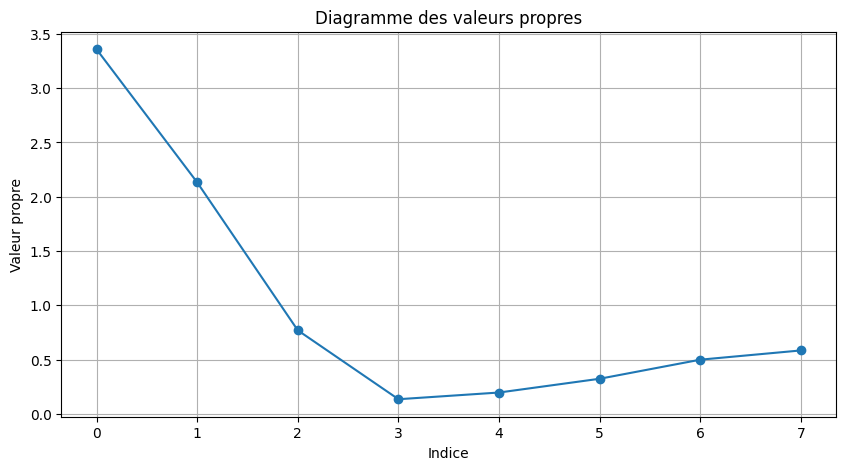

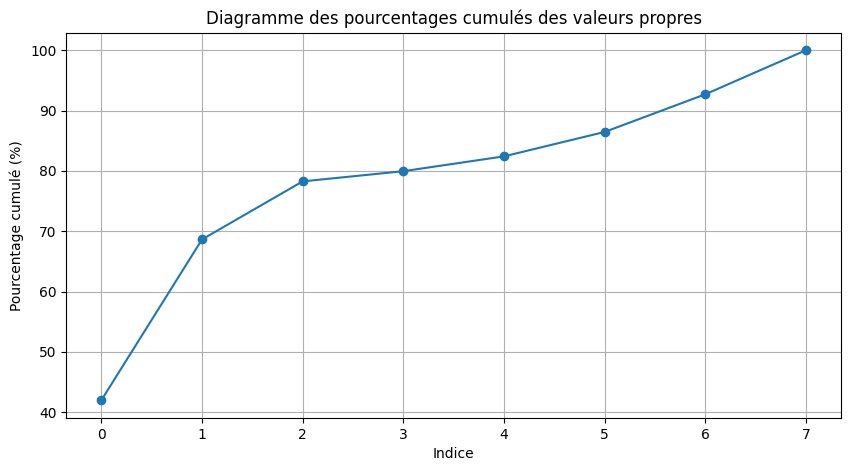

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# Diagramme des valeurs propres
plt.figure(figsize=(10, 5))
plt.plot(eigenvalues, '-o')
plt.title('Diagramme des valeurs propres')
plt.xlabel('Indice')
plt.ylabel('Valeur propre')
plt.grid(True)
plt.show()

# Calcul des pourcentages cumulés
cumulative_percentages = np.cumsum(eigenvalues) / np.sum(eigenvalues) * 100

# Diagramme des pourcentages cumulés
plt.figure(figsize=(10, 5))
plt.plot(cumulative_percentages, '-o')
plt.title('Diagramme des pourcentages cumulés des valeurs propres')
plt.xlabel('Indice')
plt.ylabel('Pourcentage cumulé (%)')
plt.grid(True)
plt.show()

Coordonnées des individus dans le nouveau repère (Tp) :
[[-3.43 -7.15]
 [-0.95 -3.  ]
 [-3.29 -6.39]
 [-3.62 -4.31]
 [-1.56 -3.04]
 [-3.05 -6.12]
 [-2.01 -3.53]
 [-0.15 -2.17]
 [-2.47 -5.73]
 [-1.14 -2.33]
 [-1.38 -2.81]
 [-0.64 -2.86]
 [-2.41 -3.58]
 [-3.32 -2.24]
 [-1.71 -2.59]
 [-0.66 -1.98]
 [-0.07 -1.65]
 [ 0.38 -1.48]
 [ 0.06 -1.48]
 [-0.42 -2.3 ]
 [-1.57 -3.26]
 [ 0.21 -1.84]
 [-3.99 -3.21]
 [-0.36 -2.35]
 [-0.08 -1.18]
 [-1.46 -3.39]
 [-0.77 -2.8 ]
 [-0.28 -2.56]
 [-2.94 -2.9 ]
 [-3.17 -1.74]
 [-2.08 -2.64]
 [-0.04 -1.91]
 [-2.46 -0.29]
 [-1.2  -0.71]
 [ 0.06 -1.78]
 [ 0.46 -0.93]
 [-6.22  0.94]
 [-6.52 -5.26]
 [-1.84 -0.73]
 [ 0.22  0.06]
 [-1.15 -0.39]
 [-6.46  1.26]
 [-0.37 -0.64]
 [ 0.1  -1.39]
 [-2.31 -3.82]
 [ 0.12 -1.67]
 [ 0.19 -1.43]
 [-0.57 -2.2 ]
 [-2.42 -1.47]
 [ 1.02 -0.37]
 [-1.08 -1.29]
 [ 0.46  0.35]
 [-1.19 -2.03]
 [-0.71 -0.85]
 [-4.71  3.34]
 [ 0.27 -0.6 ]
 [-1.3  -2.34]
 [ 0.98 -0.47]
 [ 0.82 -0.75]
 [ 0.36 -1.26]
 [-1.21 -1.51]
 [-2.04 -0.84]
 [-5.4   2.83]

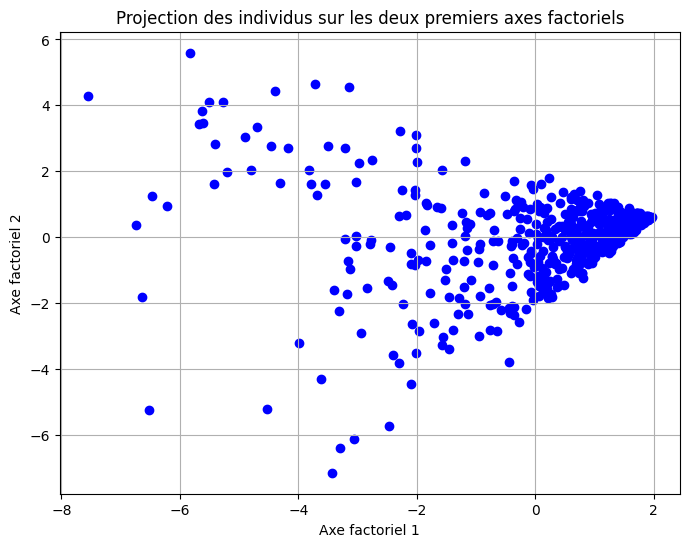

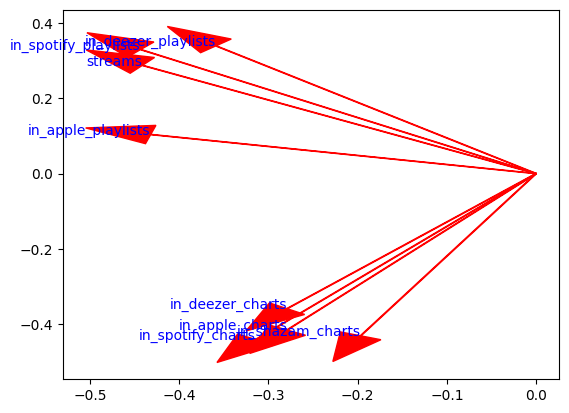

In [ ]:
selected_eigenvectors = eigenvectors[:, :2]


Tp = np.dot(Z, selected_eigenvectors)


print("Coordonnées des individus dans le nouveau repère (Tp) :")
print(Tp)



plt.figure(figsize=(8, 6))
plt.scatter(Tp[:, 0], Tp[:, 1], color='blue')


plt.xlabel('Axe factoriel 1')
plt.ylabel('Axe factoriel 2')
plt.title('Projection des individus sur les deux premiers axes factoriels')
plt.grid(True)
plt.show()


for i in range(len(df_num.columns)):
    plt.arrow(0, 0, eigenvectors[i, 0], eigenvectors[i, 1], color='red', width=0.001, head_width=0.05)
    plt.text(eigenvectors[i, 0], eigenvectors[i, 1], df_num.columns[i], color='blue', ha='right')


In [ ]:
from scipy.stats import chi2_contingency
import numpy as np
import pandas as pd
# Définir le tableau de contingence
contingency_table = pd.crosstab(df_qual['key'], df_qual['mode'])

print("Tableau de contingence :")
print(contingency_table)
n_individuals = 1000

# Calculer le tableau de contingence en fréquence
contingency_table_freq = contingency_table / np.sum(contingency_table)

# Afficher le tableau de contingence en fréquence
print("\nTableau de contingence en fréquence :")
print(contingency_table_freq)

# Calculer les profils-lignes à partir du tableau de contingence
profils_lignes = contingency_table / contingency_table.sum(axis=1)

# Afficher le tableau des profils-lignes
print("\nTableau des profils-lignes:")
print(profils_lignes)

# Calculer les profils-colonnes à partir du tableau de contingence
profils_colonnes = contingency_table / contingency_table.sum(axis=0)

# Afficher le tableau des profils-colonnes
print("\nTableau des profils-colonnes:")
print(profils_colonnes)

# Calculer les tableaux des fréquences théoriques
row_profile = np.sum(contingency_table, axis=1)
col_profile = np.sum(contingency_table, axis=0)
expected_frequency = np.outer(row_profile, col_profile) / n_individuals

# Afficher les tableaux des fréquences théoriques
print("\nTableau des fréquences théoriques :")
print(expected_frequency)

# Effectuer le test du chi-deux
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print("\nTest du chi-deux :")
print("Statistique du test du chi-deux :", chi2_stat)
print("p-value :", p_value)
print("Degré de liberté :", dof)
print("Fréquences théoriques attendues :")
print(expected)

Tableau de contingence :
mode  Major  Minor
key               
A        29     22
A#       18     15
B        17     31
C#       40     27
D        44      9
D#        4      8
E         7     24
F        32     29
F#       19     28
G        32     23
G#       33      9

Tableau de contingence en fréquence :
mode     Major     Minor
key                     
A     0.105455  0.097778
A#    0.065455  0.066667
B     0.061818  0.137778
C#    0.145455  0.120000
D     0.160000  0.040000
D#    0.014545  0.035556
E     0.025455  0.106667
F     0.116364  0.128889
F#    0.069091  0.124444
G     0.116364  0.102222
G#    0.120000  0.040000

Tableau des profils-lignes:
      A  A#   B  C#   D  D#   E   F  F#   G  G#  Major  Minor
key                                                          
A   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN    NaN    NaN
A#  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN    NaN    NaN
B   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN    NaN    NaN
C#  NaN NaN NaN NaN NaN N

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
K = pd.crosstab(df_qual['key'], df_qual['mode'])
print(K)
# Calculer le nombre total d'observations
total_observations = np.sum(K.values)
khi2 = 21.03
# Effectuer le test du chi carré
chi2, p_value, dof, expected = chi2_contingency(K)

# Afficher les résultats
print("Statistique du chi carré :", chi2)
print("Valeur de p :", p_value)
if chi2>khi2:
  print("On rejette H0 et on accepte H1, les deux vaiables sont dépendantes")
else:
  print("On accepte H0, les deux varaibles sont indépendantes")

# Calculer la matrice de fréquences
matrice_frequences = K / total_observations

# Afficher la matrice de fréquences
print("Matrice de fréquences F :")
print(matrice_frequences)

mode  Major  Minor
key               
A        29     22
A#       18     15
B        17     31
C#       40     27
D        44      9
D#        4      8
E         7     24
F        32     29
F#       19     28
G        32     23
G#       33      9
Statistique du chi carré : 54.20839669807143
Valeur de p : 4.437291154181446e-08
On rejette H0 et on accepte H1, les deux vaiables sont dépendantes
Matrice de fréquences F :
mode  Major  Minor
key               
A     0.058  0.044
A#    0.036  0.030
B     0.034  0.062
C#    0.080  0.054
D     0.088  0.018
D#    0.008  0.016
E     0.014  0.048
F     0.064  0.058
F#    0.038  0.056
G     0.064  0.046
G#    0.066  0.018


In [ ]:
# Calculer les vecteurs de poids des lignes et des colonnes (distributions marginales)
vecteur_poids_lignes = np.sum(matrice_frequences, axis=1)
vecteur_poids_colonnes = np.sum(matrice_frequences, axis=0)

# Afficher les vecteurs de poids des lignes et des colonnes
print("Vecteur de poids des lignes (distribution marginale des lignes) :\n", vecteur_poids_lignes)
print("Vecteur de poids des colonnes (distribution marginale des colonnes) :\n", vecteur_poids_colonnes)

Vecteur de poids des lignes (distribution marginale des lignes) :
 key
A     0.102
A#    0.066
B     0.096
C#    0.134
D     0.106
D#    0.024
E     0.062
F     0.122
F#    0.094
G     0.110
G#    0.084
dtype: float64
Vecteur de poids des colonnes (distribution marginale des colonnes) :
 mode
Major    0.55
Minor    0.45
dtype: float64


In [ ]:
# Calculer la matrice des profils de lignes (distribution conditionnelle en ligne)
matrice_profil_lignes = K / K.values.sum(axis=1, keepdims=True)
matrice_profil_colonnes = K / K.values.sum(axis=0, keepdims=True)
# Afficher la matrice des profils de lignes
print("Matrice des profils de lignes (distribution conditionnelle en ligne) :")
print(matrice_profil_lignes)

Matrice des profils de lignes (distribution conditionnelle en ligne) :
mode     Major     Minor
key                     
A     0.568627  0.431373
A#    0.545455  0.454545
B     0.354167  0.645833
C#    0.597015  0.402985
D     0.830189  0.169811
D#    0.333333  0.666667
E     0.225806  0.774194
F     0.524590  0.475410
F#    0.404255  0.595745
G     0.581818  0.418182
G#    0.785714  0.214286


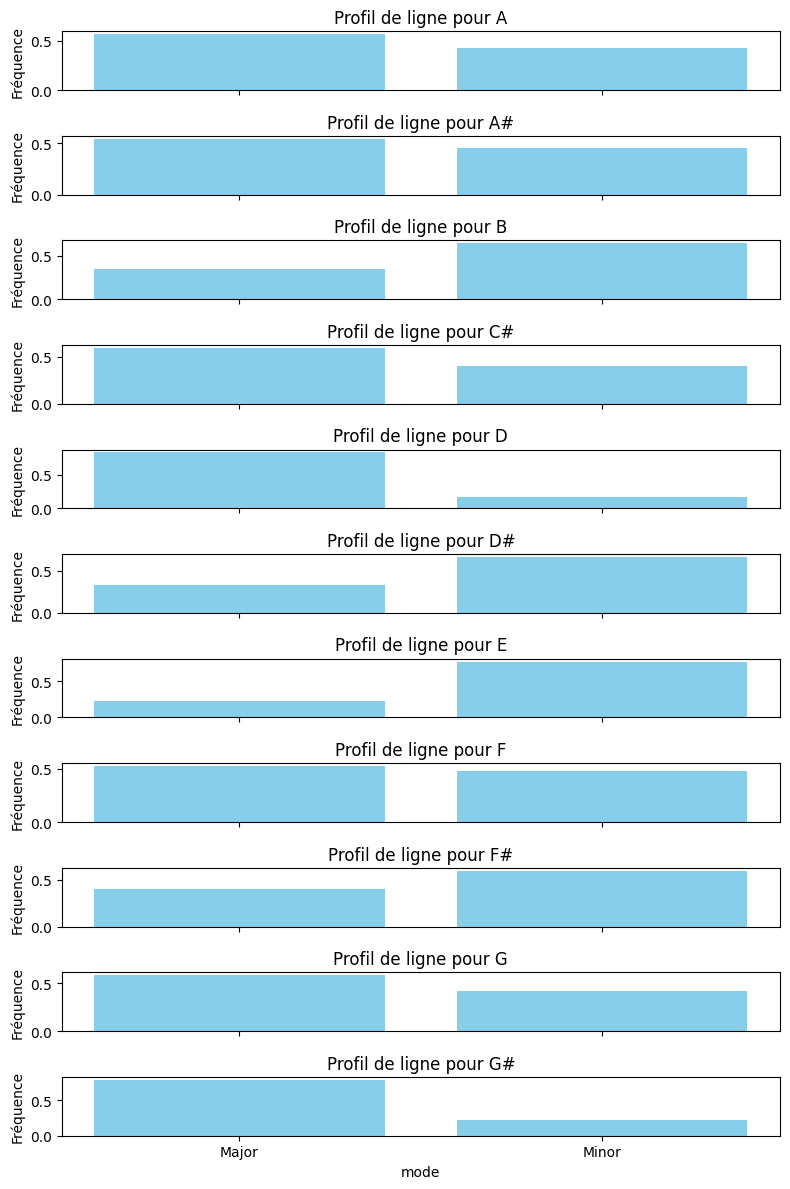

In [ ]:
import matplotlib.pyplot as plt

# Définir les couleurs des cheveux
key = ['A', 'A#', 'B', 'C#','D','D#','E','F','F#','G','G#']

# Définir les couleurs des yeux
mode = ['Major', 'Minor']

# Créer une figure
fig, axs = plt.subplots(11, 1, figsize=(8, 12), sharex=True)

# Tracer chaque profil de ligne
for i in range(len(key)):
    axs[i].bar(mode, np.array(matrice_profil_lignes)[i], color='skyblue')
    axs[i].set_ylabel('Fréquence')
    axs[i].set_title(f'Profil de ligne pour {key[i]}')

# Ajouter une étiquette à l'axe des x au dernier sous-graphique
axs[-1].set_xlabel('mode')

# Ajuster la mise en page
plt.tight_layout()

# Afficher le graphique
plt.show()

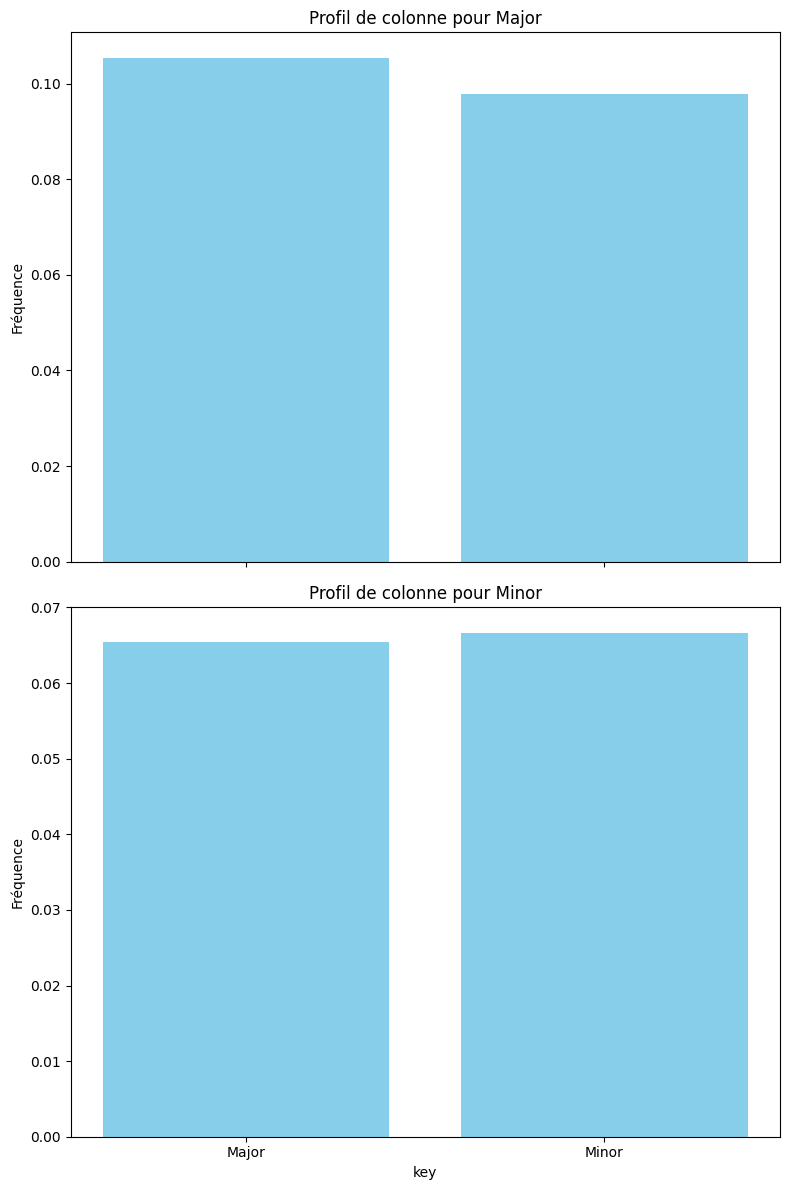

In [ ]:
import matplotlib.pyplot as plt

# Définir les couleurs des cheveux
key = ['A', 'A#', 'B', 'C#','D','D#','E','F','F#','G','G#']

# Définir les couleurs des yeux
mode = ['Major', 'Minor']

# Créer une figure
fig, axs = plt.subplots(2, 1, figsize=(8, 12), sharex=True)

# Tracer chaque profil de ligne
for i in range(len(mode)):
    axs[i].bar(mode, np.array(matrice_profil_colonnes)[i], color='skyblue')
    axs[i].set_ylabel('Fréquence')
    axs[i].set_title(f'Profil de colonne pour {mode[i]}')

# Ajouter une étiquette à l'axe des x au dernier sous-graphique
axs[-1].set_xlabel('key')

# Ajuster la mise en page
plt.tight_layout()

# Afficher le graphique
plt.show()

In [ ]:
# Calculer la matrice des profils de colonnes (distribution conditionnelle en colonne)
matrice_profil_colonnes =  K / K.values.sum(axis=0, keepdims=True)

# Afficher la matrice des profils de colonnes
print("Matrice des profils de colonnes (distribution conditionnelle en colonne) :")
print(matrice_profil_colonnes)

Matrice des profils de colonnes (distribution conditionnelle en colonne) :
mode     Major     Minor
key                     
A     0.105455  0.097778
A#    0.065455  0.066667
B     0.061818  0.137778
C#    0.145455  0.120000
D     0.160000  0.040000
D#    0.014545  0.035556
E     0.025455  0.106667
F     0.116364  0.128889
F#    0.069091  0.124444
G     0.116364  0.102222
G#    0.120000  0.040000


In [ ]:
# Définir la matrice des profils de lignes (distribution conditionnelle en ligne)
matrice_profil_lignes_tab = np.array(matrice_profil_lignes)

# Calculer le profil de ligne moyen
profil_ligne_moyen = vecteur_poids_colonnes

# Afficher le profil de ligne moyen
print("Profil de ligne moyen :\n", profil_ligne_moyen)

# Calculer le profil de colonne moyen
profil_colonne_moyen = vecteur_poids_lignes

# Afficher le profil de ligne moyen
print("Profil de colonne moyen :\n", profil_colonne_moyen)

Profil de ligne moyen :
 mode
Major    0.55
Minor    0.45
dtype: float64
Profil de colonne moyen :
 key
A     0.102
A#    0.066
B     0.096
C#    0.134
D     0.106
D#    0.024
E     0.062
F     0.122
F#    0.094
G     0.110
G#    0.084
dtype: float64


In [ ]:
# Sélectionner deux modalités à comparer
modalite1 = matrice_profil_lignes_tab[0]  # Première modalité
modalite2 = matrice_profil_lignes_tab[3]  # Deuxième modalité

modalite11 = matrice_profil_lignes_tab[1]  # Première modalité
modalite22 = matrice_profil_lignes_tab[2]  # Deuxième modalité

# Calculer la distance de chi2 entre les deux modalités
chi2_distance = np.sum((modalite1 - modalite2)**2 / profil_ligne_moyen)
chi2_distance_1 = np.sum((modalite11 - modalite22)**2 / profil_ligne_moyen)
# Afficher la distance de chi2 entre les deux modalités
print("Distance de chi2 entre les deux modalités (marron et bleu) :", chi2_distance)
print("Distance de chi2 entre les deux modalités (vert et moisette) :", chi2_distance_1)




Distance de chi2 entre les deux modalités (marron et bleu) : 0.003255954353125626
Distance de chi2 entre les deux modalités (vert et moisette) : 0.14784263665117658


K-Means

Déterminez la dimension des données et effectuez une statistique descriptive

<Figure size 1000x1000 with 0 Axes>

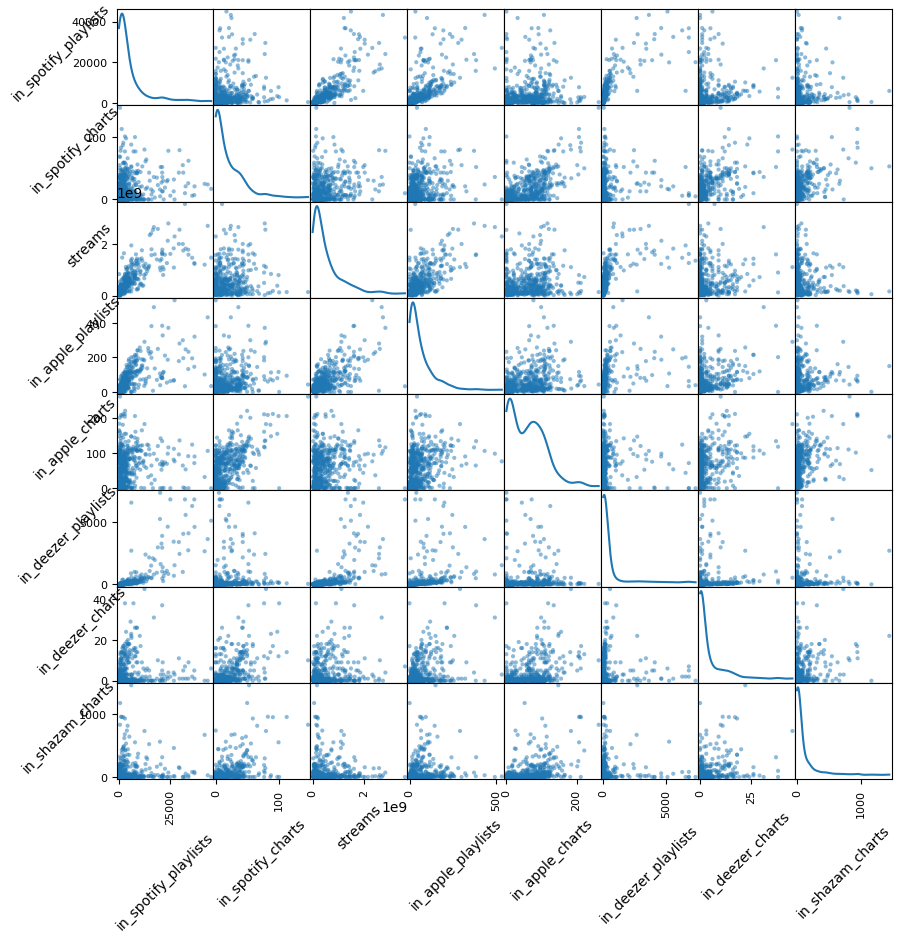

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger les données dans un DataFrame (df_num)
# Assurez-vous que df_num contient uniquement des données numériques

# Définir la taille de la figure
plt.figure(figsize=(10, 10))

# Tracer la matrice de dispersion croisée
scatter_matrix = pd.plotting.scatter_matrix(df_num, alpha=0.5, figsize=(10, 10), diagonal='kde')

# Ajuster la taille des étiquettes
[s.xaxis.label.set_size(10) for s in scatter_matrix.reshape(-1)]
[s.yaxis.label.set_size(10) for s in scatter_matrix.reshape(-1)]

# Ajuster la rotation des étiquettes
for ax in scatter_matrix.ravel():
    ax.xaxis.label.set_rotation(45)
    ax.yaxis.label.set_rotation(45)

# Afficher le graphique
plt.show()


Centrez et réduisez les données

In [ ]:
#classe StandardScaler pour standardisation (centrage et reduction)
from sklearn.preprocessing import StandardScaler
#instanciation
sc = StandardScaler()
#transformation – centrage-réduction
df_num_cr = sc.fit_transform(df_num)

Effectuez la méthode de classification K-means avec 3 groupes (clusters)

In [ ]:
#k-means
from sklearn import cluster
import numpy as np

kmeans = cluster.KMeans(n_clusters=3)
kmeans.fit(df_num_cr)

#index triés des groupes
idk = np.argsort(kmeans.labels_)
#affichage des observations et leurs groupes
Cldf=pandas.DataFrame(df_num.index[idk],kmeans.labels_[idk])
print(Cldf)
#distances aux centres de classes des observations
A=kmeans.transform(df_num_cr)
print(A)
print(pandas.DataFrame({'Classe':kmeans.labels_+1,'ID':df_num.index,'DistG1':A[:,0],'DistG2':A[:,1],'DistG3':A[:,2]}))
#print(pandas.DataFrame({'Classe':kmeans.labels_+1,'ID':X.index,'Fonction':Tab.Fonction}))

#print(Tab.Fonction[idk])
#ACP
from sklearn.decomposition import PCA
acp= PCA(n_components =2).fit_transform(df_num)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


                                           track_name
0                                          Mami Chula
0      STAR WALKIN' (League of Legends Worlds Anthem)
0   Lift Me Up - From Black Panther: Wakanda Forev...
0                                               Shirt
0                                        Boy's a liar
..                                                ...
2                                        Shake It Off
2            Why'd You Only Call Me When You're High?
2                                        Shape of You
2                              Somewhere Only We Know
2             Every Breath You Take - Remastered 2003

[500 rows x 1 columns]
[[ 9.17  6.5  10.12]
 [ 3.74  1.43  6.34]
 [ 8.2   5.36  9.18]
 ...
 [ 0.79  3.83  5.07]
 [ 3.66  4.6   3.43]
 [ 1.53  3.3   4.56]]
     Classe                                   ID    DistG1    DistG2  \
0         2  Seven (feat. Latto) (Explicit Ver.)  9.173654  6.495195   
1         2                                 LALA  3.

Effectuez la méthode de classification K-means avec 4 groupes (clusters)

In [ ]:
#k-means sur les données centrées et réduites
from sklearn import cluster
kmeans = cluster.KMeans(n_clusters=4)
kmeans.fit(df_num_cr)
#index triés des groupes
idk = np.argsort(kmeans.labels_)
#affichage des observations et leurs groupes
print(pandas.DataFrame(df_num.index[idk],kmeans.labels_[idk]))
#distances aux centres de classes des observations
A=kmeans.transform(df_num_cr)
print(pandas.DataFrame({'Classe':kmeans.labels_,'ID':df_num.index,'DistG1':A[:,0],'DistG2':A[:,1],'DistG3':A[:,2],'DistG4':A[:,3]}))
#print(kmeans.transform(fromage_cr))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


                                 track_name
0                       The Real Slim Shady
0                           Don't Start Now
0                             We Found Love
0   Every Breath You Take - Remastered 2003
0                 STAY (with Justin Bieber)
..                                      ...
3                                  En Paris
3                              The Business
3                             METAMORPHOSIS
3                                  Superman
3                     I WANNA BE YOUR SLAVE

[500 rows x 1 columns]
     Classe                                   ID     DistG1    DistG2  \
0         2  Seven (feat. Latto) (Explicit Ver.)  10.301939  7.475821   
1         1                                 LALA   6.629456  2.161892   
2         2                              vampire   9.367312  6.491102   
3         2                         Cruel Summer   7.150886  4.497520   
4         1                       WHERE SHE GOES   6.395110  2.264546   
..      ..

Méthode du coude pour le choix du nombre de clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

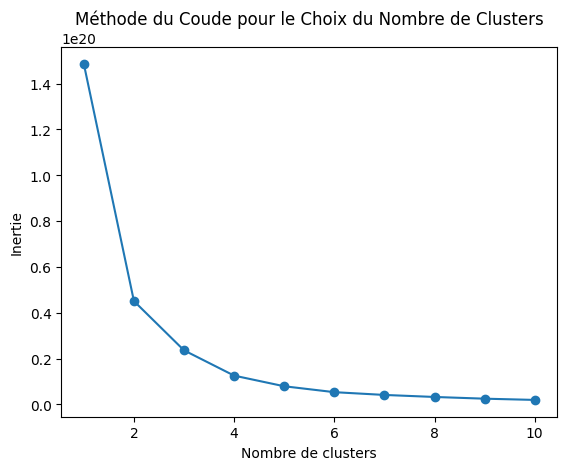

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calcul de l'inertie pour différents nombres de clusters
inertias = []
for i in range(1, 11):  # Tester pour un nombre de clusters de 1 à 10
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_num.values)
    inertias.append(kmeans.inertia_)

# Tracé de la courbe du coude
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel("Inertie")
plt.title('Méthode du Coude pour le Choix du Nombre de Clusters')
plt.show()

**Interprétation des classes : statistiques comparatives**

Dans cette partie, nous allons comparer les moyennes des variables actives conditionnellement aux groupes. Il est possible de quantifier globalement l’amplitude des écarts avec la proportion de variance expliquée (carré du rapport de corrélation).  


In [ ]:
# Application de l'algorithme K-means
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df_num_cr)

# Ajout des informations de clusters aux données
df_num['cluster'] = clusters

# Calcul des moyennes des caractéristiques de chaque cluster
cluster_means = df_num.groupby('cluster').mean()
print("Moyennes des caractéristiques de chaque cluster :")
print(cluster_means)

# Calcul des différences significatives entre les clusters
cluster_diff = cluster_means.diff().iloc[1:]  # Différences par rapport au premier cluster
print("\nDifférences significatives entre les clusters :")
print(cluster_diff)

# Caractéristiques les plus discriminantes pour chaque cluster
print("\nCaractéristiques les plus discriminantes pour chaque cluster :")
for i, row in cluster_diff.iterrows():
    print(f"Cluster {i}:")
    max_diff_feature = row.idxmax()
    max_diff_value = row.max()
    print(f"Caractéristique la plus discriminante: {max_diff_feature}, Différence: {max_diff_value}")

Moyennes des caractéristiques de chaque cluster :
         in_spotify_playlists  in_spotify_charts       streams  \
cluster                                                          
0                23855.400000          23.244444  1.774221e+09   
1                 2444.983827           9.886792  3.146659e+08   
2                 5392.904762          48.583333  6.185516e+08   

         in_apple_playlists  in_apple_charts  in_deezer_playlists  \
cluster                                                             
0                189.688889        63.933333          2818.400000   
1                 38.458221        45.342318            68.983827   
2                100.738095       117.654762           269.595238   

         in_deezer_charts  in_shazam_charts  
cluster                                      
0                3.111111         71.955556  
1                1.412399         35.323450  
2               13.142857        282.571429  

Différences significatives entre les clust

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


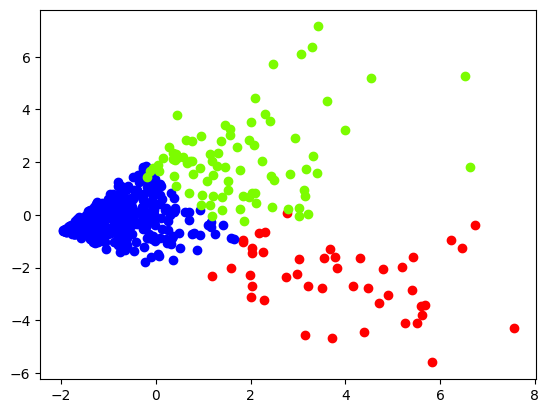

In [ ]:
from sklearn.decomposition import PCA
acp = PCA(n_components = 2).fit_transform(df_num_cr)
#projeter dans le plan factoriel
#avec un code couleur différent selon le groupe
#remarquer le rôle de zip() dans la boucle
for couleur,k in zip(['red', 'blue', 'lawngreen'],[0,1,2]):
  plt.scatter(acp[kmeans.labels_==k,0], acp[kmeans.labels_==k,1],c= couleur)
plt.show()

In [ ]:
import pandas
#Stat - librairie numpy
import numpy as np
#scikit-learn
import sklearn
#scree plot
import matplotlib.pyplot as plt
X = pandas.read_table ("Fromages.txt", sep="\t\t\t",header=0, index_col =0)
print(X)

(500, 8)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


                                     track_name
0           Seven (feat. Latto) (Explicit Ver.)
0                                   Ain���t Tha
0                           One Thing At A Time
0                  on the street (with J. Cole)
0                              Marisola - Remix
..                                          ...
3   It's Beginning To Look A Lot Like Christmas
3      It's the Most Wonderful Time of the Year
3        Let It Snow! Let It Snow! Let It Snow!
3                                         Ditto
3                         I WANNA BE YOUR SLAVE

[500 rows x 1 columns]
     Classe                                   ID        DistG1        DistG2  \
0         0  Seven (feat. Latto) (Explicit Ver.)  1.911037e+07  1.203018e+09   
1         0                                 LALA  2.677579e+07  1.210683e+09   
2         0                              vampire  2.048810e+07  1.204395e+09   
3         3                         Cruel Summer  6.403487e+08  5.435586e+08   


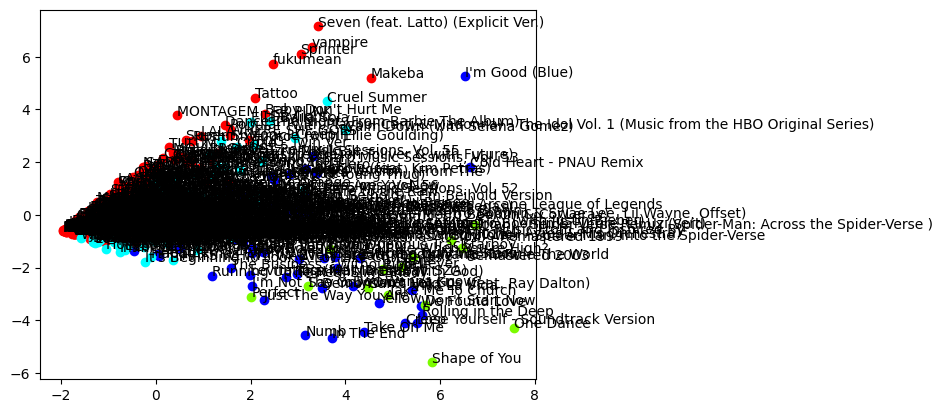

In [ ]:
#dimension
print(X.shape)
#nombre d'observations
n = X.shape[0]
#nombre de variables
p = X.shape[1]

#k-means
from sklearn import cluster
kmeans = cluster.KMeans(n_clusters=4)
kmeans.fit(X)

#index triés des groupes
idk = np.argsort(kmeans.labels_)

#affichage des observations et leurs groupes
print(pandas.DataFrame(df_num.index[idk],kmeans.labels_[idk]))

#distances aux centres de classes des observations
A=kmeans.transform(X)
print(pandas.DataFrame({'Classe':kmeans.labels_,'ID':df_num.index,'DistG1':A[:,0],'DistG2':A[:,1],'DistG3':A[:,2],'DistG4':A[:,3]}))

from sklearn.preprocessing import StandardScaler
#instanciation
sc = StandardScaler()
#transformation – centrage-réduction
Z = sc.fit_transform(X)

from sklearn.decomposition import PCA
acp= PCA(n_components =2).fit_transform(Z)


#projeter dans le plan factoriel
#avec un code couleur différent selon le groupe
#remarquer le rôle de zip() dans la boucle
import matplotlib.pyplot as plt
for couleur,k in zip([ 'red','blue','lawngreen','aqua'],[0,1,2,3]):
    plt.scatter(acp[kmeans.labels_==k,0], acp[kmeans.labels_==k,1],c=couleur)

n = X.shape[0]
#mettre les labels des points
for i in range(n):
    plt.annotate(df_num.index[i],(acp[i,0], acp[i,1]))
plt.show()

[[4.77e+02 4.78e+02 3.16e+03 2.00e+00]
 [1.88e+02 4.10e+02 3.20e+03 2.00e+00]
 [5.00e+01 3.35e+02 3.96e+03 2.00e+00]
 ...
 [9.92e+02 9.93e+02 4.59e+09 5.70e+01]
 [9.94e+02 9.95e+02 7.37e+09 4.43e+02]
 [9.96e+02 9.97e+02 1.39e+10 5.00e+02]]
[275 285 279 135 414 345  62 229 207 104 435 231 489 142 433 399 462 196
 216 330 304 259 117 222 479 318 165 218 123 150  81 329  23 127 342 465
   9 141 156 101  55   4 430 295 347 352 227 369  11 293 357  60 467  75
  43 492 456 163 177 213  58  24  48  83  13  97 182  37  94 175 179   7
 393  31 365 230 355 208 381  71 181 272 319 497 148 301 111 420 339  15
 167 262  53 138 121 143 136 349 180 173  12  45 331 379 193  87 239 323
 470 161  95  39   1 250 209 482 417  61 378 214   5  74   6 253 164  57
  85 145 137 490 370 169 390  28 276  38 477   8  82 153  49  34  14  26
 205  46  41 274  72 140  19  10  21 376 124 187 132  56  40 463 473  20
 168 494 108 236 499  29 197 286 312 454 246 244 248 364 240 294 191 242
 183 391 174 333 106 110 185 4

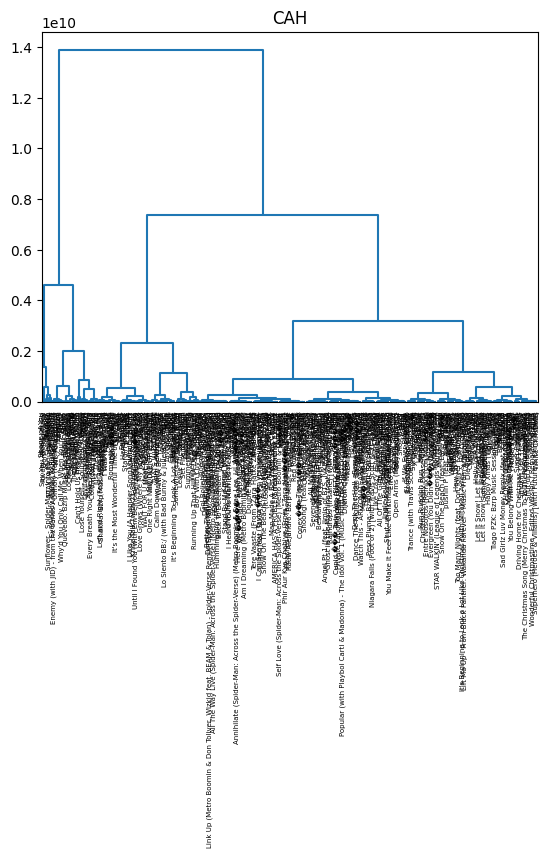

In [ ]:
#librairies pour la CAH
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram , linkage, fcluster

#générer la matrice des liens
#Z = linkage(X,method='single',metric='euclidean') critère minimum
#Z = linkage(X,method='complete',metric='euclidean') critère maximum

Z = linkage(X,method='ward',metric='euclidean')
print(Z)


#affichage du dendrogramme
plt.title("CAH")
#découpage à la hauteur 300 ==> identifiants de 4 groupes obtenus
dendrogram(Z,labels=df_num.index,color_threshold =300)
plt.show

groupes_cah= fcluster(Z,t =300,criterion ='distance')
print (groupes_cah)

#index triés des groupes
idg = np.argsort (groupes_cah)
#affichage des observations et leurs groupes
print(pandas.DataFrame(df_num.index[idg],groupes_cah[idg]))

#affichage des observations et leurs groupes
cl=pandas.DataFrame({'Streams': df.streams , 'in_deezer_playlists': df.in_deezer_playlists})
print(cl)
gr = cl.groupby('Streams')
for col in cl.columns:
 print('Moyenne',col)
 print(gr[col].mean())



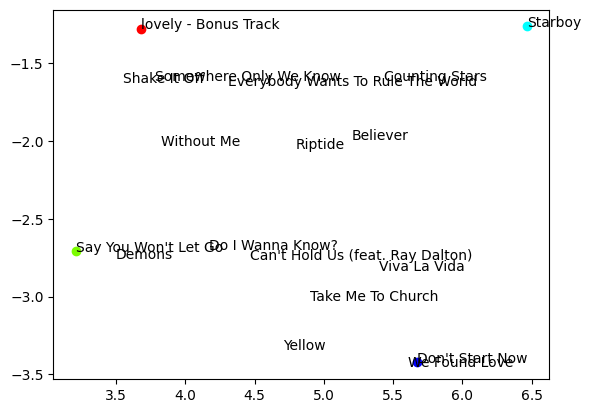

In [ ]:
########################ACP
from sklearn.preprocessing import StandardScaler
#instanciation
sc = StandardScaler()
#transformation – centrage-réduction
Z = sc.fit_transform(X)

from sklearn.decomposition import PCA
acp= PCA(n_components =2).fit_transform(Z)

#projeter dans le plan factoriel
#avec un code couleur différent selon le groupe
#remarquer le rôle de zip() dans la boucle
import matplotlib.pyplot as plt
for couleur,k in zip([ 'red','blue','lawngreen','aqua'],[1,2,3,4]):
    plt.scatter(acp[groupes_cah==k,0], acp[groupes_cah==k,1],c=couleur)

n = X.shape[0]
#mettre les labels des points
for i in range(n):
    plt.annotate(df_num.index[i],(acp[i,0], acp[i,1]))
plt.show()